# Limpieza de datos

Vamos a aplicar el [checklist del Banco Mundial](https://dimewiki.worldbank.org/wiki/Checklist:_Data_Cleaning) en Python usando el [SciPy stack](https://www.scipy.org/stackspec.html), principalmente pandas

## 0. Prerequisitos

Aclaración: La próxima celda es para compatilibidad con Colab, NO ES RECOMENDADO realizar pip install desde un notebook.

In [1]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."
if 'ftfy' not in sys.modules:
    !pip install ftfy

# 1. Importando los datos

# 1.1. Verificar que no hay problemas en la importación

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

#### Veamos de importar datos de proyectos de Kickstarter la plataforma de Crowdsourcing. 
Kickstarter es un sitio web para proyectos creativos que van desde películas independientes, música y cómics a periodismo, videojuegos y proyectos relacionados con la comida. 

Siendo uno nuevo en el conjunto de plataformas de recaudación de fondos llamado «financiación en masa». Kickstarter facilita la captación de recursos monetarios del público en general. Los proyectos deben cumplir con las directrices de Kickstarter para ponerse en marcha - proyectos de caridad, de causas, de «financiación de vida» y recaudación de fondos sin límites fijos no están permitidos. Los dueños del proyecto eligen una fecha límite y un mínimo objetivo de fondos a recaudar. Si el objetivo elegido no es recolectado en el plazo, no se perciben fondos. 

Datos tomados de https://www.kaggle.com/kemical/kickstarter-projects/data

In [3]:
kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

Por defecto Pandas falla si hay errores para leer datos https://pandas.pydata.org/pandas-docs/stable/io.html#error-handling

Por ahora cambiamos a un archivo más actualizado, volveremos a este error más adelante

In [4]:
kickstarter_2018 = pd.read_csv(BASE_DIR + "./input/kickstarter-projects/ks-projects-201801.csv")

FileNotFoundError: [Errno 2] File b'.../input/kickstarter-projects/ks-projects-201801.csv' does not exist: b'.../input/kickstarter-projects/ks-projects-201801.csv'

Veamos los datos cargados en el dataframe

In [10]:
# pledged: lo prometido por la multitud
# state: la actual condición del proyecto
# backers: numero de patrocinadores
# usd pledged y usd_pledged_real son las conversiones monetarias a usd hechas por ks y fixer.io api
kickstarter_2018

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
5,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
6,1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
7,1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
8,1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00
9,100004195,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.00,2014-07-11 21:55:48,6240.57,canceled,43,US,6240.57,6240.57,65000.00


Por defecto solo vemos los valores al comienzo o al final del archivo.

Tomemos una muestra al azar para ver valores más dispersos

In [11]:
# set seed for reproducibility
import numpy as np
np.random.seed(0)

In [12]:
kickstarter_2018.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
338862,796196901,10G Christmas Tree,Art,Art,USD,2010-12-26,10526.00,2010-12-08 08:44:04,0.00,failed,0,US,0.00,0.00,10526.00
277871,483825010,Gliff,Gaming Hardware,Games,USD,2016-03-28,10000.00,2016-01-28 04:56:18,51.00,failed,5,US,51.00,51.00,10000.00
47000,123916947,STUFFED Food Truck,Food Trucks,Food,USD,2015-01-06,60000.00,2014-11-07 02:24:36,25.00,failed,1,US,25.00,25.00,60000.00
111338,1565733636,NeoExodus Adventure: Origin of Man for Pathfin...,Tabletop Games,Games,USD,2012-05-01,500.00,2012-03-15 01:16:10,585.00,successful,17,US,585.00,585.00,500.00
53743,1273544891,NAPOLEON IN NEW YORK! an original TV Series,Comedy,Film & Video,USD,2016-07-26,25000.00,2016-05-27 00:07:25,25.00,failed,1,US,25.00,25.00,25000.00


No se observa a simple vista ningún problema obvio.

Notar que todos vimos los mismos resultados. Al fijar la semilla no hubo tal azar, esto es algo necesario cuando queremos "reproducir valores aleatorios"

Veamos la descripción del dataset si se corresponde con lo levantado https://www.kaggle.com/kemical/kickstarter-projects/data

In [13]:
pd.DataFrame([["ID", "No description provided", "Numeric"],
["name", "No description provided", "String"],
["category", "No description provided", "String"],
["main_category", "No description provided", "String"],
["currency", "No description provided", "String"],
["deadline", "No description provided", "DateTime"],
["goal", "Goal amount in project currency", "Numeric"],
["launched", "No description provided", "DateTime"],
["pledged", "Pledged amount in the project currency", "Numeric"],
["state", "No description provided", "String"],
["backers", "No description provided", "Numeric"],
["country", "No description provided", "String"],
["usd pledged", "Pledged amount in USD (conversion made by KS)", "Numeric"],
["usd_pledged_real", "Pledged amount in USD (conversion made by fixer.io api)", "Numeric"],
["usd_goal_real", "Goal amount in USD", "Numeric"]], columns=["Field name","Field description", "Type"])

,Field name,Field description,Type
0,ID,No description provided,Numeric
1,name,No description provided,String
2,category,No description provided,String
3,main_category,No description provided,String
4,currency,No description provided,String
5,deadline,No description provided,DateTime
6,goal,Goal amount in project currency,Numeric
7,launched,No description provided,DateTime
8,pledged,Pledged amount in the project currency,Numeric
9,state,No description provided,String


Ahora veamos los tipos de datos que detectó pandas

In [14]:
kickstarter_2018.dtypes

ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

Los campos object generalmente son String, entonces parece que no reconoció como fechas en **deadline** y **launched** :(

Veamos un resumen de los datos

In [15]:
kickstarter_2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378661.00,378661.00,378661.00,374864.00,378661.00,378661.00
mean,1074731191.99,49080.79,9682.98,105.62,7036.73,9058.92,45454.40
std,619086204.32,1183391.26,95636.01,907.19,78639.75,90973.34,1152950.06
min,5971.00,0.01,0.00,0.00,0.00,0.00,0.01
25%,538263516.00,2000.00,30.00,2.00,16.98,31.00,2000.00
50%,1075275634.00,5200.00,620.00,12.00,394.72,624.33,5500.00
75%,1610148624.00,16000.00,4076.00,56.00,3034.09,4050.00,15500.00
max,2147476221.00,100000000.00,20338986.27,219382.00,20338986.27,20338986.27,166361390.71


Por defecto se ven los datos numéricos, veamos el resto. Describe toma solo los datos numericos para sacar las medidas descriptivas. 

Ahora vemos el resumen solo para los objetos.

In [17]:
kickstarter_2018.describe(include=['object'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


Operemos un cacho sobre los datos de lanzamiento

In [18]:
kickstarter_2018['launched'].min()

'1970-01-01 01:00:00'

Parece funcionar, pero ahora calculemos el rango de fechas de los proyectos

In [22]:
#kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min() # tira error porque no puede restar strings
kickstarter_2018['launched'].max()

'2018-01-02 15:02:31'

Indiquemos que columnas son fechas como indica la [documentación](https://pandas.pydata.org/pandas-docs/stable/io.html#datetime-handling)

In [23]:
# ORIGINAL: kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
#                               parse_dates=["deadline","launched"])
kickstarter_2018 = pd.read_csv("./input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"])
kickstarter_2018.dtypes

ID                           int64
name                        object
category                    object
main_category               object
currency                    object
deadline            datetime64[ns]
goal                       float64
launched            datetime64[ns]
pledged                    float64
state                       object
backers                      int64
country                     object
usd pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [25]:
kickstarter_2018.describe(include=['object'])
# deadline y launched ya no se toman como listas

,name,category,main_category,currency,state,country
count,378657,378661,378661,378661,378661,378661
unique,375764,159,15,14,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,41,22314,63585,295365,197719,292627


Ahora vemos que esas columnas fueron reconocidas como fechas

Veamos la misma muestra de nuevo

In [26]:
kickstarter_2018.sample(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
299667,595962034,Button Poetry Live!,Mixed Media,Art,USD,2015-09-18,10000.00,2015-08-19 19:34:20,18216.27,successful,455,US,18216.27,18216.27,10000.00
181674,1924707671,"C STREET 2012 : Tbilisi, Georgia",World Music,Music,USD,2012-06-07,5000.00,2012-05-08 18:22:59,7210.69,successful,82,US,7210.69,7210.69,5000.00
137583,1698707842,Dérive's Next Project,Punk,Music,USD,2014-07-06,1200.00,2014-06-08 17:58:37,1255.66,successful,33,US,1255.66,1255.66,1200.00
296861,581269566,Photo Book - World Santa Claus Congress,Photobooks,Photography,DKK,2017-04-14,110000.00,2017-03-14 23:45:35,462.00,failed,5,DK,0.00,66.46,15823.47
66362,1337585114,Kickstart CLE Brewing to greatness!,Drinks,Food,USD,2017-08-19,6500.00,2017-07-20 21:22:43,250.00,failed,5,US,75.00,250.00,6500.00


Y veamos el resumen de los datos

In [27]:
kickstarter_2018.describe(include='all')
# los NaN son los que no calcula

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378661.00,378657,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00
unique,nan,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,nan,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,nan,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,nan,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,nan,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,1074731191.99,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40
std,619086204.32,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06
min,5971.00,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01
25%,538263516.00,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00


Podemos ver que tenemos primero y último en el resumen de las columnas de fechas.

Ahora deberíamos poder calcular el rango de fechas de lanzamietos

In [28]:
kickstarter_2018['launched'].max() - kickstarter_2018['launched'].min()

Timedelta('17533 days 14:02:31')

# 1.2. Asegurar de tener ids/claves únicas

Chequear que no hay datos duplicados

In [29]:
kickstarter_2018.shape

(378661, 15)

Pandas soporta índices en los DataFrames vamos a recargar el conjunto de datos

In [30]:
# ORIGINAL: kickstarter_2018 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201801.csv", 
#                               parse_dates=["deadline","launched"],
#                               index_col=['ID'])

kickstarter_2018 = pd.read_csv("./input/kickstarter-projects/ks-projects-201801.csv", 
                               parse_dates=["deadline","launched"],
                               index_col=['ID'])

In [31]:
kickstarter_2018

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.00,2015-08-11 12:12:28,0.00,failed,0,GB,0.00,0.00,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.00,2017-09-02 04:43:57,2421.00,failed,15,US,100.00,2421.00,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.00,2013-01-12 00:20:50,220.00,failed,3,US,220.00,220.00,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.00,2012-03-17 03:24:11,1.00,failed,1,US,1.00,1.00,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.00,2015-07-04 08:35:03,1283.00,canceled,14,US,1283.00,1283.00,19500.00
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.00,2016-02-26 13:38:27,52375.00,successful,224,US,52375.00,52375.00,50000.00
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.00,2014-12-01 18:30:44,1205.00,successful,16,US,1205.00,1205.00,1000.00
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.00,2016-02-01 20:05:12,453.00,failed,40,US,453.00,453.00,25000.00
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.00,2014-04-24 18:14:43,8233.00,canceled,58,US,8233.00,8233.00,125000.00


In [32]:
kickstarter_2018.shape

(378661, 14)

De esta forma podemos buscar por el índice

In [33]:
kickstarter_2018.loc[999988282]

name                Nou Renmen Ayiti!  We Love Haiti!
category                              Performance Art
main_category                                     Art
currency                                          USD
deadline                          2011-08-16 00:00:00
goal                                          2000.00
launched                          2011-07-19 09:07:47
pledged                                        524.00
state                                          failed
backers                                            17
country                                            US
usd pledged                                    524.00
usd_pledged_real                               524.00
usd_goal_real                                 2000.00
Name: 999988282, dtype: object

También podemos verificar si hay filas de contenidos duplicado

In [34]:
kickstarter_2018[kickstarter_2018.duplicated()]
# en este caso no hay filas duplicadas

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


Como Pandas acepta valores duplicados en los índices también debemos verificar ahí

In [35]:
pd.Series(kickstarter_2018.index,dtype=str).describe()

count        378661
unique       378661
top       268790737
freq              1
Name: ID, dtype: object

Como count y unique son iguales, significa que no hay índices duplicados

In [36]:
kickstarter_2018[kickstarter_2018.index.duplicated()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,


Repasamos con un ejemplo de juguete

In [37]:
csv='1,2\n3,3\n1,3'
print(csv)

1,2
3,3
1,3


In [38]:
from io import StringIO
df = pd.read_csv(StringIO(csv), names=['id','value'], index_col='id')
df

,value
id,
1,2
3,3
1,3


In [39]:
df[df.duplicated()]

,value
id,
1,3


In [40]:
df[df.index.duplicated(keep=False)]

,value
id,
1,2
1,3


#### Ejercicio 1:

Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados. 

In [89]:
# Primero se ordena el dataframe por nombres
ordenados= kickstarter_2018.sort_values(by='name')
# Luego se muestran los nombres duplicados
duplicados = ordenados[ordenados.name.duplicated(keep=False)]
duplicados # lo dejo en otro dataframe para usarlo luego

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00
422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.00,2015-06-27 02:02:00,100.00,failed,1,US,100.00,100.00,100000.00
866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00
1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.00,2014-07-29 13:12:21,11260.00,canceled,7,US,11260.00,11260.00,15000.00
1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.00,2016-05-07 01:56:36,0.00,canceled,0,"N,0""",nan,0.00,5000.00


# 1.3. Despersonalizar datos y guardarlos en un nuevo archivo

Hay muuuchas técnicas para despersonalizar datos.

Para ilustrar mostramos las ofrecidas por Google https://cloud.google.com/dlp/docs/transformations-reference:

* **Reemplazo**: Reemplaza cada valor de entrada con un valor determinado.
* **Ocultamiento**: Quita un valor y lo oculta.
* **Enmascaramiento con caracteres**: Enmascara una string por completo o parcialmente mediante el reemplazo de un número determinado de caracteres con un carácter fijo especificado..
* **Seudonimización mediante el reemplazo de un valor de entrada con un hash criptográfico**: Reemplaza valores de entrada con una string hexadecimal de 32 bytes mediante una clave de encriptación de datos.
* **Cambio de fechas**: Cambia las fechas por un número de días al azar, con la opción de ser coherente en el mismo contexto..
* **Seudonimización mediante el reemplazo con token de preservación de formato criptográfico**: Reemplaza un valor de entrada con un token, o valor sustituto, de la misma longitud mediante la encriptación de preservación de formato (FPE) con el modo de operación FFX. Esto permite que se use el resultado en sistemas con validación de formato o que necesitan aparecer como reales a pesar de que la información no se revela.
* **Valores de depósito con base en rangos de tamaño fijos**: Enmascara los valores de entrada y los reemplaza por depósitos, o rangos dentro de los cuales se encuentra el valor de entrada.
* **Valores de depósito con base en rangos de tamaño personalizados**: Valores de entrada de depósito con base en rangos configurables por el usuario y valores de reemplazo.
* **Extracción de datos de tiempo**: EExtrae o preserva una porción de los valores Date, Timestamp y TimeOfDay.

In [69]:
from hashlib import md5

In [70]:
kickstarter_2018['name'].apply(md5)
# ERROR: Los objetos Unicode se deben codificar antes del hashing

TypeError: Unicode-objects must be encoded before hashing

In [71]:
def hashit(val):
    return md5(val.encode('utf-8'))

kickstarter_2018['name'].apply(hashit)

AttributeError: 'float' object has no attribute 'encode'

In [72]:
def hashit(val):
    try:
        return md5(val.encode('utf-8'))
    except Exception as e:
        print(val, type(val))
        raise(e)

kickstarter_2018['name'].apply(hashit)
#ERROR: veo que tiene problema para codificar un float, en particular un nan

nan <class 'float'>


AttributeError: 'float' object has no attribute 'encode'

### (Nota: apply hace un for. no es eficiente. siempre buscar como hacer una transformacion en tabla con pandas. El último recurso es usar apply.)

Una función criptográfica hash- es un algoritmo matemático que transforma cualquier bloque arbitrario de datos en una nueva serie de caracteres con una longitud fija. Independientemente de la longitud de los datos de entrada, el valor hash de salida tendrá siempre la misma longitud. SHA-1 es una de las funciones hash más ampliamente utilizadas en la informática, junto con MD 5 y SHA-2. SHA-1 devuelve un hash diferente segun la palabra sea Hola u hola. Por ejemplo se usan los hash para las contraseñas en sitios web.

In [75]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()
# codifico los objetos antes de aplicarles un hashing

kickstarter_2018['name'].apply(hashit)

ID
2128520745    8836426892604a6ad27afe623ae66f40
770056389     7dc79d2d8f3f879551cfa8276947d4a7
165319510     ea924ae54542b6a5240def11e8e40439
1350231316    567e2c437b4bac2cea36cd2d1b2cd1e2
1160349822    7b7a2e8ef966be48625f3163e7552cda
1329577260    8ddc925e90ea876c02ef758885725ffb
466499577     6f1685f728bea61a9999ce41e34619a6
234284139     4f53ad73ea4b616374bb19e1a3c2053a
132957259     c010d9ff1c1b385e53905fda5ddd9eed
1792331218    86202e7ed842af6550287585f0e5305d
1898836590    23512ab26ecbe0893ca663828655552e
663769771     bc3aa90548448f7cec486958ad3f9a3f
2085121393    b9dce72b53083e487ad8ffa114ec6c4b
305842754     c75cc7754be366ce83a31735a908544a
1707959338    0fc40772f061ada9717321c3399f039b
1243737397    a39b871b12bc2ac30d92372651030afe
1883066194    2a3486063dfa212cf4744098bab962b2
14498203      a41f691fd87986333b86fc94c527b4f1
1904422702    91960edf3870cbcf6e5d1f06c3043f1a
1762670729    775f0419df6a3d2a7a124bf6599c5c99
149233916     4ce1f10179a90d7127d306df1dadb779
1359752672

#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [90]:
# Veo que se repite el codigo hashit para los nombres que estan duplicados
duplicados['codigo_hashit'] = duplicados['name'].apply(hashit)
duplicados

C:\Users\Flor\Anaconda3\envs\diplodatos\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,codigo_hashit
ID,,,,,,,,,,,,,,,
815783250,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.00,2014-01-03 20:39:16,37.00,failed,3,US,37.00,37.00,6500.00,0c7a251ffe4c7834cbc4b04906952ff1
816998285,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.00,2013-12-19 21:51:50,0.00,canceled,0,US,0.00,0.00,6500.00,0c7a251ffe4c7834cbc4b04906952ff1
713417995,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.00,2013-01-26 03:51:47,1417.00,failed,26,US,1417.00,1417.00,5000.00,67554ab4203d95f2f2f05365f768206e
1010584633,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.00,2011-08-28 21:27:52,3000.00,successful,24,US,3000.00,3000.00,3000.00,67554ab4203d95f2f2f05365f768206e
422509694,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.00,2017-04-14 00:08:52,1.00,failed,1,US,25.00,1.00,100000.00,19a82bc4c5961834282575d07d9b5f7c
1880084695,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.00,2015-06-27 02:02:00,100.00,failed,1,US,100.00,100.00,100000.00,19a82bc4c5961834282575d07d9b5f7c
866225086,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.00,2015-01-27 19:30:43,7248.00,canceled,9,US,7248.00,7248.00,20000.00,b4ca2044f21f67e13ddb7583f59189a7
1760892298,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.00,2014-07-29 13:12:21,11260.00,canceled,7,US,11260.00,11260.00,15000.00,b4ca2044f21f67e13ddb7583f59189a7
1999958521,"""Color"" Music Video",Film & Video,Film & Video,USD,2016-06-06,5000.00,2016-05-07 01:56:36,0.00,canceled,0,"N,0""",nan,0.00,5000.00,bed6c6cbc0540c8d40b7e2311806cc5c


# 1.4. Nunca modificar los datos crudos u originales


El siguiente código hace:

Si no estoy en colab, sino que estoy en mi directorio. Exporta lo que hay en kickstarter_2018 a un archivo csv previamente creado y nombrado 'ks-projects-201801-for-pandas.csv' en la carpeta output.

In [94]:
if not in_colab:
  # ORIGINAL: kickstarter_2018.to_csv(BASE_DIR + "./output/ks-projects-201801-for-pandas.csv")
    kickstarter_2018.to_csv("./output/ks-projects-201801-for-pandas.csv")


# 2. Pasos necesarios


In [95]:
#import pandas as pd
if not in_colab:
    kickstarter_2018 = pd.read_csv("./output/ks-projects-201801-for-pandas.csv",
                        index_col='ID',
                        parse_dates=['deadline','launched'])
#  ORIGINAL: kickstarter_2018 = pd.read_csv(BASE_DIR + "/output/ks-projects-201801-for-pandas.csv",
#                        index_col='ID',
#                        parse_dates=['deadline','launched'])
    

In [96]:
kickstarter_2018.describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
count,378657,378661,378661,378661,378661,378661.00,378661,378661.00,378661,378661.00,378661,374864.00,378661.00,378661.00
unique,375764,159,15,14,3164,nan,378089,nan,6,nan,23,nan,nan,nan
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08 00:00:00,nan,1970-01-01 01:00:00,nan,failed,nan,US,nan,nan,nan
freq,41,22314,63585,295365,705,nan,7,nan,197719,nan,292627,nan,nan,nan
first,NaN,NaN,NaN,NaN,2009-05-03 00:00:00,nan,1970-01-01 01:00:00,nan,NaN,nan,NaN,nan,nan,nan
last,NaN,NaN,NaN,NaN,2018-03-03 00:00:00,nan,2018-01-02 15:02:31,nan,NaN,nan,NaN,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,49080.79,NaN,9682.98,NaN,105.62,NaN,7036.73,9058.92,45454.40
std,NaN,NaN,NaN,NaN,NaN,1183391.26,NaN,95636.01,NaN,907.19,NaN,78639.75,90973.34,1152950.06
min,NaN,NaN,NaN,NaN,NaN,0.01,NaN,0.00,NaN,0.00,NaN,0.00,0.00,0.01
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,30.00,NaN,2.00,NaN,16.98,31.00,2000.00


## 2.1. Etiquetas de variables/columnas: no usar caracteres especiales



In [97]:
# helpful character encoding module
import chardet

¿Por qué? Por que aun hay limitaciones para trabajar con estos caracteres.

¿Cúales son los caracteres "normales"? 

In [99]:
import string

string.ascii_letters + '/' + string.digits

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ/0123456789'

¿Qué es ASCII? Es una de las primeras codificaciones (o encoding) disponibles. Ver https://en.wikipedia.org/wiki/ASCII

Un encoding es un mapa de caracteres a una representación en bits (por ejemplo 1000001). ASCII es uno de los primeros estandares para interoperatividad entre computadoras (antes cada fabricante de computadora usa su propia codificación), contempla sólo los caracteres ingleses y usa 7 bits, por ejemplo *1000001* codifica el caracter *A*

Cómo sólo representaban los caracteres ingleses, empiezan a aparecer variantes para distintos idiomas, Microsoft hizo los propios para internacionalizar Windows, hubo otro estandar ISO 8859, hasta que llegó el éstandar Unicode que hizo múltiples encodings pero cada uno contempla múltiples idiomas e incluso es extensible a futuro. UTF-8 es de esos encodings el más utilizado. Ver https://en.wikipedia.org/wiki/Unicode

En particular, Python 3 utiliza UTF-8 por defecto (lo que no sucedía en Python 2).

Veamos un ejemplo práctico

https://en.wikipedia.org/wiki/Unicode:

Unicode es un estándar de la industria de la computación para la codificación, representación y manejo consistentes del texto expresado en la mayoría de los sistemas de escritura del mundo. El consorcio Unicode mantiene el estándar y, a partir de marzo de 2019, la versión más reciente, Unicode 12.0, contiene un repertorio de 137,993 caracteres que cubren 150 scripts modernos e históricos, así como múltiples conjuntos de símbolos y emoji. El repertorio de caracteres de Unicode Standard está sincronizado con ISO / IEC 10646, y ambos son código por código idénticos.
El estándar de Unicode consiste en un conjunto de tablas de códigos para referencia visual, un método de codificación y un conjunto de codificaciones de caracteres estándar, un conjunto de archivos de datos de referencia y una serie de elementos relacionados, tales como propiedades de caracteres, reglas de normalización, descomposición, intercalación , representación y orden de visualización bidireccional (para la visualización correcta del texto que contiene los scripts de derecha a izquierda, como el árabe y el hebreo, y los scripts de izquierda a derecha).

En Python 3.0, las cadenas se almacenan como Unicode, es decir, cada carácter de la cadena está representado por un punto de código. Entonces, cada cadena es solo una secuencia de puntos de código Unicode.

Para un almacenamiento eficiente de estas cadenas, la secuencia de puntos de código se convierte en un conjunto de bytes. El proceso se conoce como codificación (encoding).

Hay varias codificaciones presentes que tratan un string de manera diferente. Las codificaciones populares son utf-8, ascii, etc.

**Usando el método encode() para string, puedes convertir cadenas sin codificar en cualquier codificación compatible con Python. Por defecto, Python usa la codificación utf-8.**

In [100]:
# start with a string
before = "This is the euro symbol: €"

# check to see what datatype it is
type(before)

str

In [101]:
# encode it to a different encoding, replacing characters that raise errors
# el utf-8 por defecto en python los guarda como bytes. Probamos:
after = before.encode("utf-8", errors = "replace")

# check the type
type(after)

bytes

In [102]:
# take a look at what the bytes look like
after

b'This is the euro symbol: \xe2\x82\xac'

**El método decode() decodifica la cadena usando el códec registrado para la codificación.**

In [103]:
# convert it back to utf-8
print(after.decode("utf-8"))

This is the euro symbol: €


**Python 3 usa por defecto utf-8. Cuando me llegan los datos, si se ven raros, los paso a utf-8 con decode.**

In [106]:
# try to decode our bytes with the ascii encoding
print(after.decode("ascii"))

This is the euro symbol: ?


In [105]:
# start with a string
before = "This is the euro symbol: €"

# encode it to a different encoding, replacing characters that raise errors
after = before.encode("ascii", errors = "replace")

# convert it back to utf-8
print(after.decode("ascii"))

# We've lost the original underlying byte string! It's been 
# replaced with the underlying byte string for the unknown character :(

This is the euro symbol: ?


Cuando no conoce el caracter pone: ? Problema: no puedo distinguir cuando es un error y cuando es un ? posta

Este error ya lo vimos...

In [107]:
# ORIGINAL: kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv")
kickstarter_2016 = pd.read_csv("./input/kickstarter-projects/ks-projects-201612.csv")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x99 in position 11: invalid start byte

El error `UnicodeDecodeError` nos indica que el archivo no estaría en Unicode. Si no está en algún metadato o no fue indicado es dificil detectar el encoding, por suerte hay un paquete para esto en Python, que aplica unas heurísticas para detectar encoding.

In [109]:
# In Colab we need to download data locally
if in_colab:
  !wget -c $BASE_DIR/input/kickstarter-projects/ks-projects-201612.csv
  DOWN_DIR = "./"
else:
  #ORIGINAL: DOWN_DIR = BASE_DIR + "/input/kickstarter-projects/"
    DOWN_DIR = "./input/kickstarter-projects/"
  
# look at the first ten thousand bytes to guess the character encoding
with open(DOWN_DIR + "/ks-projects-201612.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
# metodo chartdet.detect para saber en que codificacion estan los datos
# check what the character encoding might be
result

{'encoding': 'Windows-1252', 'confidence': 0.73, 'language': ''}

Entonces le podemos indicar el encoding al leer el archivos

In [110]:
# read in the file with the encoding detected by chardet
#ORIGINAL: kickstarter_2016 = pd.read_csv(BASE_DIR + "/input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')
kickstarter_2016 = pd.read_csv("./input/kickstarter-projects/ks-projects-201612.csv", encoding='Windows-1252')

# look at the first few lines
kickstarter_2016.head()

C:\Users\Flor\Anaconda3\envs\diplodatos\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,nan
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,nan
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,nan
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,nan
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,nan


Hay otro problema con los caracteres que es más sutíl: **[Mojibake](https://en.wikipedia.org/wiki/Mojibake)**

Sucede al leer UTF-8 como ASCII extendido (ie. `Windows-*`, `iso-8859-*` entre otros)

Ejemplo de mojibake:

**Mojibake** es el texto confuso que es el resultado de la decodificación del texto usando una codificación de caracteres no intencionales. El resultado es un reemplazo sistemático de símbolos con símbolos completamente no relacionados, a menudo de un sistema de escritura diferente.
Esta pantalla puede incluir el carácter de reemplazo genérico (" ") en lugares donde la representación binaria se considera inválida. Un reemplazo también puede involucrar múltiples símbolos consecutivos, como se ve en una codificación, cuando el mismo código binario constituye un símbolo en la otra codificación. Esto se debe a la diferente codificación de longitud constante (como en las codificaciones asiáticas de 16 bits frente a las codificaciones europeas de 8 bits), o al uso de codificaciones de longitud variable (en particular, UTF-8 y UTF-16).

In [111]:
"cigüeña".encode('utf-8').decode('iso-8859-1')

'cigÃ¼eÃ±a'

Para esto vamos a usar un módulo específico [ftfy](https://ftfy.readthedocs.io/en/latest/). 

Que nos permite ordenar cadenas por rareza. El modulo calcula que tan raro es un caracter de un texto. le aplicamos la func...

In [114]:
#!pip install ftfy    (ya lo instalé)
import ftfy.badness as bad

In [115]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)


kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
551994337,?? cybertwee ?? ¨*:·. bake sale on the deep we...,Digital Art,Art,USD,2015-09-18,100.00,2015-09-14 04:14:05,347.00,successful,66,US,347.00,347.00,100.00,2
2068157547,Ballet Folklorico Infantil de la Universidad ...,Art,Art,MXN,2017-04-03,40000.00,2017-03-22 16:33:33,42480.00,successful,38,MX,532.09,2263.79,2131.63,2
1234089244,Cracking (Mastering) the Metaphor (Political)...,Nonfiction,Publishing,USD,2013-10-27,30000.00,2013-09-27 23:33:29,0.00,failed,0,US,0.00,0.00,30000.00,2
960506632,Degreesº to Extinction,Documentary,Film & Video,USD,2016-12-21,30000.00,2016-12-06 00:26:54,30.00,failed,2,US,5.00,30.00,30000.00,2
2096648634,Funky City : a funky rpg,Video Games,Games,USD,2017-04-08,5000.00,2017-03-09 04:05:15,0.00,failed,0,US,0.00,0.00,5000.00,2
549309727,Higher Grounds Coffee Company Mobile Coffee Tr...,Food Trucks,Food,USD,2018-01-12,10000.00,2017-12-07 16:07:54,4882.00,live,36,US,542.00,4882.00,10000.00,2
1719215256,Kickstarter Gold: Manual Coffeemaker Nº3,Product Design,Design,USD,2017-07-22,60000.00,2017-06-20 15:29:56,68587.33,successful,618,US,21002.00,68587.33,60000.00,2
466898065,Manual Tea Maker Nº1,Product Design,Design,USD,2016-08-20,40000.00,2016-07-18 04:25:44,67767.00,successful,1111,US,5534.00,67767.00,40000.00,2
2102265118,Music Album ¨Dreams¨ Uplifting Tunes with Rap,Hip-Hop,Music,EUR,2017-12-24,28000.00,2017-11-24 12:49:09,0.00,failed,0,NL,0.00,0.00,33580.39,4


**sequence_weirdness** Determina con qué frecuencia un texto tiene caracteres inesperados o secuencias de caracteres inesperadas. Esta métrica se usa para desambiguar cuando el texto se debe volver a decodificar o dejar como está.

Volviendo a la consigna original, chequeamos que no haya caracteres fuera de a-Z, 0-9 y _ en los nombres de columnas

In [116]:
kickstarter_2018.columns[~kickstarter_2018.columns.str.match(r'^(\w+)$')]

Index(['usd pledged'], dtype='object')

In [117]:
kickstarter_2018.usd_pledged.head()

AttributeError: 'DataFrame' object has no attribute 'usd_pledged'

In [118]:
kickstarter_2018.columns = kickstarter_2018.columns.str.replace(' ', '_')
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
2128520745,IT’S A HOT CAPPUCCINO NIGHT,Fiction,Publishing,USD,2010-12-05,2000.00,2010-11-04 23:46:07,20.00,failed,1,US,20.00,20.00,2000.00,-1
770056389,"""Pastriology"": a global documentary",Documentary,Film & Video,USD,2011-01-01,3625.00,2010-11-25 06:28:55,205.00,failed,3,US,205.00,205.00,3625.00,0
165319510,15 A Feature Length Film (Canceled),Narrative Film,Film & Video,USD,2011-05-12,3600.00,2011-04-11 06:44:40,144.00,canceled,10,US,144.00,144.00,3600.00,0
1350231316,"""A Fine Mess."" A Television Sitcom Pilot",Shorts,Film & Video,USD,2009-12-15,5000.00,2009-11-04 22:31:44,510.00,failed,6,US,510.00,510.00,5000.00,0
1160349822,"""A TERRIBLE LIE,"" a new play by Jim Reyland",Theater,Theater,USD,2010-10-15,3500.00,2010-08-18 17:20:54,45.00,failed,3,US,45.00,45.00,3500.00,0


In [119]:
kickstarter_2018.usd_pledged.head()

ID
2128520745    20.00
770056389    205.00
165319510    144.00
1350231316   510.00
1160349822    45.00
Name: usd_pledged, dtype: float64

#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [121]:
#importo el ks-projects-201801.csv con encoding iso-8859-1
kickstarter_2018_iso = pd.read_csv("./input/kickstarter-projects/ks-projects-201801.csv", encoding='iso-8859-1')
#calculo la metrica weirdness para los nombres. Lo guardo en la columna 'name_weirdness'
kickstarter_2018_iso['name_weirdness'] = kickstarter_2018_iso['name'].apply(weird)
kickstarter_2018_iso[kickstarter_2018_iso['name_weirdness'] > 1]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
63,1000235643,HIIT Bottleâ¢,Drinks,Food,USD,2015-04-27,15000.00,2015-03-13 18:33:08,124998.00,successful,2784,US,124998.00,124998.00,15000.00,2
70,1000260691,Gizbeeâ¢ Unlimited Removable Storage for Your...,Gadgets,Technology,USD,2016-03-25,87000.00,2016-02-29 20:30:27,2030.00,canceled,15,US,2030.00,2030.00,87000.00,2
123,1000519001,Wordwright: reÂ·deÂ·finÂ·ing word play,Tabletop Games,Games,USD,2015-12-29,2000.00,2015-11-21 14:12:27,14794.00,successful,624,US,14794.00,14794.00,2000.00,6
157,1000644119,OperaciÃ³n Douve,Action,Film & Video,EUR,2016-05-01,100.00,2016-03-02 19:09:05,20.00,failed,2,ES,21.77,22.85,114.27,2
184,1000767040,Strait Jacket â Tangle Prevention For Headph...,Product Design,Design,USD,2016-11-23,30000.00,2016-10-24 03:35:51,1041.00,canceled,46,US,549.00,1041.00,30000.00,4
238,1001042227,Via ChicâOneClutchâ¢,Product Design,Design,USD,2015-08-14,75000.00,2015-06-30 03:47:54,1736.00,failed,21,US,1736.00,1736.00,75000.00,6
325,1001484182,Daweyu Hills â Crop to Cup,Drinks,Food,USD,2015-10-15,25000.00,2015-09-15 21:01:47,25816.00,successful,172,US,25816.00,25816.00,25000.00,4
326,1001490622,TimeChatâ¢ (Canceled),Apps,Technology,AUD,2014-10-24,33000.00,2014-09-23 21:05:58,1110.00,canceled,5,AU,991.48,976.08,29018.64,2
437,1002098978,Lux3 â Wellness Lamp,Product Design,Design,EUR,2016-05-05,150000.00,2016-03-21 17:23:46,491.00,failed,16,IT,553.34,561.07,171405.06,4
470,1002234028,Ã¦mp:dance / amiti perry + company,Dance,Dance,USD,2011-05-30,3500.00,2011-05-18 20:06:41,3520.00,successful,30,US,3520.00,3520.00,3500.00,2


In [126]:
# Para compararlas rarezas de los nombres usamos:
print(kickstarter_2018[kickstarter_2018['name_weirdness'] > 1]['name_weirdness'].describe())
print(kickstarter_2018_iso[kickstarter_2018_iso['name_weirdness'] > 1]['name_weirdness'].describe())
# Al cargar los datos con la codificación iso-8859-1 se obtienen 7682 nombres raros (mucho mas que los 26 datos raros con utf-3)
#ya que éste no es el formato original en que fueron codificados.

count   26.00
mean     2.19
std      0.57
min      2.00
25%      2.00
50%      2.00
75%      2.00
max      4.00
Name: name_weirdness, dtype: float64
count   7682.00
mean       3.53
std        1.97
min        2.00
25%        2.00
50%        4.00
75%        4.00
max       20.00
Name: name_weirdness, dtype: float64


## 2.2. Tratar valores faltantes

Veamos cuantos valores nulos tenemos

In [127]:
# get the number of missing data points per column
missing_values_count = kickstarter_2018.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[missing_values_count > 0]

name              4
usd_pledged    3797
dtype: int64

Esta medida en sí, no dice nada más que con cuantos valores debemos lidiar. 

Primero tenemos que ver si en términos relativos su impacto.

pandas.isnull(obj) ----> Detecta los valores perdidos (NaN in numeric arrays, None/NaN in object arrays)

In [128]:
len(kickstarter_2018.dropna())/len(kickstarter_2018)

0.9899619976707398

In [129]:
len(kickstarter_2018.dropna(subset=['name']))/len(kickstarter_2018)

0.9999894364616372

También debemos ver que significan en términos de representatividad e importancia de nuestro análisis.

In [130]:
kickstarter_2018[kickstarter_2018.name.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.00,2012-01-01 12:35:31,100.00,failed,1,US,100.00,100.00,200000.00,0
634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.00,2012-12-19 23:57:48,196.00,failed,12,GB,317.73,316.05,3224.97,0
648853978,NaN,Product Design,Design,USD,2016-07-18,2500.00,2016-06-18 05:01:47,0.00,suspended,0,US,0.00,0.00,2500.00,0
796533179,NaN,Painting,Art,USD,2011-12-05,35000.00,2011-11-06 23:55:55,220.00,failed,5,US,220.00,220.00,35000.00,0


Ejemplo, cuantos de los proyectos suspendidos no tienen nombre

In [131]:
len(kickstarter_2018[kickstarter_2018.state == 'suspended'].dropna(subset=['name'])) / \
    len(kickstarter_2018[kickstarter_2018.state == 'suspended']) 

0.9994582881906826

En este caso, creemos que es seguro descartar los proyectos sin nombre. Pues son solo 4, un porcentaje ínfimo respecto de los proyectos totales.

In [132]:
kickstarter_2018 = kickstarter_2018.dropna(subset=['name'])

dropna solo para la columna name. sino me borra los nan y filas de todas las otras columnas

In [133]:
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

usd_pledged    3797
dtype: int64

In [134]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1632079034,""" IN THE MIND OF A SOLDIER""",Publishing,Publishing,USD,2015-03-14,5000.00,2015-02-10 05:22:02,10.00,undefined,0,"N,0""",nan,10.00,5000.00,0
1161148029,""" The Amazing adventures of Prince Alex & Prin...",Publishing,Publishing,USD,2015-11-21,5216.00,2015-10-22 22:58:10,0.00,undefined,0,"N,0""",nan,0.00,5216.00,0
759717900,"""A Love Like This"" Music Video",Film & Video,Film & Video,USD,2014-07-22,1500.00,2014-07-02 02:26:14,1510.00,undefined,0,"N,0""",nan,1510.00,1500.00,0
761570019,"""A Reckoning In Goldenburg"" / Trailer for West...",Film & Video,Film & Video,USD,2014-12-04,2500.00,2014-11-04 06:58:34,845.00,undefined,0,"N,0""",nan,845.00,2500.00,0
1458468160,"""A River's View of Sunrise"" - Ben Carr's 5th S...",Music,Music,USD,2016-04-27,5000.00,2016-03-28 18:09:25,621.00,failed,0,"N,0""",nan,621.00,5000.00,0
1604309820,"""Aires Sureños"" Original Piano Pieces CD by RA...",Music,Music,USD,2015-06-22,3500.00,2015-05-20 13:33:55,3613.00,undefined,0,"N,0""",nan,3613.00,3500.00,0
924209812,"""Always Music"" an original album",Music,Music,USD,2015-01-07,1500.00,2014-12-08 20:45:41,1985.00,undefined,0,"N,0""",nan,1985.00,1500.00,0
872159476,"""BORDERLESS"" - Are You Ready for Some Folk & H...",Music,Music,USD,2014-09-10,9000.00,2014-08-04 03:20:40,9710.99,undefined,0,"N,0""",nan,9710.99,9000.00,0
1485046391,"""Backstage"" | a new album by BRBRCK & the iLL ...",Music,Music,USD,2015-11-16,2000.00,2015-10-07 18:07:29,3001.44,undefined,0,"N,0""",nan,3001.44,2000.00,0


In [135]:
kickstarter_2018[kickstarter_2018.usd_pledged.isnull()].describe(include='all')

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
count,3797,3797,3797,3797,3797,3797.00,3797,3797.00,3797,3797.00,3797,0.00,3797.00,3797.00,3797.00
unique,3764,28,12,10,722,nan,3797,nan,6,nan,1,nan,nan,nan,nan
top,New EP/Music Development,Music,Music,USD,2015-05-01 00:00:00,nan,2015-10-27 17:00:11,nan,undefined,nan,"N,0""",nan,nan,nan,nan
freq,28,2387,2388,2738,26,nan,1,nan,3562,nan,3797,nan,nan,nan,nan
first,NaN,NaN,NaN,NaN,2012-04-24 00:00:00,nan,2012-03-14 19:05:44,nan,NaN,nan,NaN,nan,nan,nan,nan
last,NaN,NaN,NaN,NaN,2016-07-07 00:00:00,nan,2016-05-21 20:45:12,nan,NaN,nan,NaN,nan,nan,nan,nan
mean,NaN,NaN,NaN,NaN,NaN,5413.35,NaN,3023.26,NaN,0.00,NaN,nan,2949.85,5097.31,-0.01
std,NaN,NaN,NaN,NaN,NaN,37466.24,NaN,44919.41,NaN,0.00,NaN,nan,44881.72,37258.79,0.12
min,NaN,NaN,NaN,NaN,NaN,108.00,NaN,0.00,NaN,0.00,NaN,nan,0.00,85.28,-3.00
25%,NaN,NaN,NaN,NaN,NaN,2000.00,NaN,5.00,NaN,0.00,NaN,nan,5.00,2250.00,0.00


Interesante, todos los datos pertenecen a un país indeterminado.

Todos los datos de ese "país" no tienen dinero prometido? 
(Busco si hay proyectos del país N,0 que tengan dolares prometidos) 

Si todos los proyectos de ese "país" no tienen dinero prometido, se debería ver que pasó con la carga de datos.

In [136]:
kickstarter_2018[(kickstarter_2018.country == 'N,0"') & ~(kickstarter_2018.usd_pledged.isnull())].head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,


A priori como los proyectos no tienen patrocinantes, completamos en 0 los valores

.fillna() ---> Rellena los valores NA / NaN usando un valor o método especificado

In [137]:
kickstarter_2018 = kickstarter_2018.fillna(0)
missing_values_count = kickstarter_2018.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [138]:
kickstarter_2018.shape

(378657, 15)

Más métodos disponibles en https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-missing y http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

## 2.3. Codificar variables

Para trabajar con los algoritmos de aprendizaje automático, las variables categóricas deben ser codificadas como variables numéricas, no como cadenas.

Para esta tarea también hay diferentes estrategias, dos comunes son: asociar cadena a número y asociar cadena a columna.

In [139]:
from sklearn import preprocessing

In [140]:
kickstarter_2018.describe(include=['O'])

,name,category,main_category,currency,state,country
count,378657,378657,378657,378657,378657,378657
unique,375764,159,15,14,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,failed,US
freq,41,22313,63584,295362,197716,292624


1° Primera estrategia: **Asociar los strings de categorías a números**

In [141]:
column='main_category'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])

LabelEncoder()

In [142]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'Art': 0,
 'Comics': 1,
 'Crafts': 2,
 'Dance': 3,
 'Design': 4,
 'Fashion': 5,
 'Film & Video': 6,
 'Food': 7,
 'Games': 8,
 'Journalism': 9,
 'Music': 10,
 'Photography': 11,
 'Publishing': 12,
 'Technology': 13,
 'Theater': 14}

In [143]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
2128520745,IT’S A HOT CAPPUCCINO NIGHT,Fiction,12,USD,2010-12-05,2000.00,2010-11-04 23:46:07,20.00,failed,1,US,20.00,20.00,2000.00,-1
770056389,"""Pastriology"": a global documentary",Documentary,6,USD,2011-01-01,3625.00,2010-11-25 06:28:55,205.00,failed,3,US,205.00,205.00,3625.00,0
165319510,15 A Feature Length Film (Canceled),Narrative Film,6,USD,2011-05-12,3600.00,2011-04-11 06:44:40,144.00,canceled,10,US,144.00,144.00,3600.00,0
1350231316,"""A Fine Mess."" A Television Sitcom Pilot",Shorts,6,USD,2009-12-15,5000.00,2009-11-04 22:31:44,510.00,failed,6,US,510.00,510.00,5000.00,0
1160349822,"""A TERRIBLE LIE,"" a new play by Jim Reyland",Theater,14,USD,2010-10-15,3500.00,2010-08-18 17:20:54,45.00,failed,3,US,45.00,45.00,3500.00,0


In [144]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
2128520745,IT’S A HOT CAPPUCCINO NIGHT,Fiction,Publishing,USD,2010-12-05,2000.00,2010-11-04 23:46:07,20.00,failed,1,US,20.00,20.00,2000.00,-1
770056389,"""Pastriology"": a global documentary",Documentary,Film & Video,USD,2011-01-01,3625.00,2010-11-25 06:28:55,205.00,failed,3,US,205.00,205.00,3625.00,0
165319510,15 A Feature Length Film (Canceled),Narrative Film,Film & Video,USD,2011-05-12,3600.00,2011-04-11 06:44:40,144.00,canceled,10,US,144.00,144.00,3600.00,0
1350231316,"""A Fine Mess."" A Television Sitcom Pilot",Shorts,Film & Video,USD,2009-12-15,5000.00,2009-11-04 22:31:44,510.00,failed,6,US,510.00,510.00,5000.00,0
1160349822,"""A TERRIBLE LIE,"" a new play by Jim Reyland",Theater,Theater,USD,2010-10-15,3500.00,2010-08-18 17:20:54,45.00,failed,3,US,45.00,45.00,3500.00,0


2° Segunda estrategia: **Asociar los strings a columnas**

In [145]:
from sklearn.preprocessing import LabelBinarizer
other_column = 'state'

lb = LabelBinarizer()

lb_results = lb.fit_transform(kickstarter_2018[other_column])
pd.DataFrame(lb_results, columns=((other_column + '_') + pd.Series(lb.classes_))).head(10)

,state_canceled,state_failed,state_live,state_successful,state_suspended,state_undefined
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,1,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,1,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,1,0,0
9,0,1,0,0,0,0


More about preprocessing in http://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

#### Ejercicio 4

Codificar `currency` con ambas estrategias

**1° de strings a números**

In [146]:
column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
le.fit(kickstarter_2018[column])
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13}

In [148]:
# Apply the fitted encoder to the pandas column
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
2128520745,IT’S A HOT CAPPUCCINO NIGHT,Fiction,Publishing,13,2010-12-05,2000.00,2010-11-04 23:46:07,20.00,failed,1,US,20.00,20.00,2000.00,-1
770056389,"""Pastriology"": a global documentary",Documentary,Film & Video,13,2011-01-01,3625.00,2010-11-25 06:28:55,205.00,failed,3,US,205.00,205.00,3625.00,0
165319510,15 A Feature Length Film (Canceled),Narrative Film,Film & Video,13,2011-05-12,3600.00,2011-04-11 06:44:40,144.00,canceled,10,US,144.00,144.00,3600.00,0
1350231316,"""A Fine Mess."" A Television Sitcom Pilot",Shorts,Film & Video,13,2009-12-15,5000.00,2009-11-04 22:31:44,510.00,failed,6,US,510.00,510.00,5000.00,0
1160349822,"""A TERRIBLE LIE,"" a new play by Jim Reyland",Theater,Theater,13,2010-10-15,3500.00,2010-08-18 17:20:54,45.00,failed,3,US,45.00,45.00,3500.00,0


In [149]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
2128520745,IT’S A HOT CAPPUCCINO NIGHT,Fiction,Publishing,USD,2010-12-05,2000.00,2010-11-04 23:46:07,20.00,failed,1,US,20.00,20.00,2000.00,-1
770056389,"""Pastriology"": a global documentary",Documentary,Film & Video,USD,2011-01-01,3625.00,2010-11-25 06:28:55,205.00,failed,3,US,205.00,205.00,3625.00,0
165319510,15 A Feature Length Film (Canceled),Narrative Film,Film & Video,USD,2011-05-12,3600.00,2011-04-11 06:44:40,144.00,canceled,10,US,144.00,144.00,3600.00,0
1350231316,"""A Fine Mess."" A Television Sitcom Pilot",Shorts,Film & Video,USD,2009-12-15,5000.00,2009-11-04 22:31:44,510.00,failed,6,US,510.00,510.00,5000.00,0
1160349822,"""A TERRIBLE LIE,"" a new play by Jim Reyland",Theater,Theater,USD,2010-10-15,3500.00,2010-08-18 17:20:54,45.00,failed,3,US,45.00,45.00,3500.00,0


**2° de strings a columnas**

In [147]:
#lb = LabelBinarizer()  (ya inicializado anteriormente)
lb_results = lb.fit_transform(kickstarter_2018[column])
pd.DataFrame(lb_results, columns=((column + '_') + pd.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Duda: en string a columna no entiendo si aun se puede mostrar la tabla kickstarter_2018 con los numeros de columna en currency, o como sería

## 2.4. No cambiar los nombres de las variables de la fuente de origen


## 2.5. Verificar la consistencia de las variables
Aplicar reglas de integridad


In [150]:
kickstarter_2018.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
2128520745,IT’S A HOT CAPPUCCINO NIGHT,Fiction,Publishing,USD,2010-12-05,2000.00,2010-11-04 23:46:07,20.00,failed,1,US,20.00,20.00,2000.00,-1
770056389,"""Pastriology"": a global documentary",Documentary,Film & Video,USD,2011-01-01,3625.00,2010-11-25 06:28:55,205.00,failed,3,US,205.00,205.00,3625.00,0
165319510,15 A Feature Length Film (Canceled),Narrative Film,Film & Video,USD,2011-05-12,3600.00,2011-04-11 06:44:40,144.00,canceled,10,US,144.00,144.00,3600.00,0
1350231316,"""A Fine Mess."" A Television Sitcom Pilot",Shorts,Film & Video,USD,2009-12-15,5000.00,2009-11-04 22:31:44,510.00,failed,6,US,510.00,510.00,5000.00,0
1160349822,"""A TERRIBLE LIE,"" a new play by Jim Reyland",Theater,Theater,USD,2010-10-15,3500.00,2010-08-18 17:20:54,45.00,failed,3,US,45.00,45.00,3500.00,0


¿Hay proyectos sin patrocinadores pero con plata prometida? Sí, hay 315 proyectos.

(recordar que antes completé todos los nan con 0)

In [151]:
kickstarter_2018[(kickstarter_2018.backers == 0) & (kickstarter_2018.usd_pledged > 0)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1279244729,"""BUMS"" - Reality TV show exploring the lives o...",Documentary,Film & Video,USD,2017-11-18,100000.00,2017-10-04 00:12:44,0.00,failed,0,US,22.00,0.00,100000.00,0
1138745536,"""Born Again"" - Share Your Inner Beauty with th...",Nature,Photography,USD,2017-05-10,50000.00,2017-04-10 00:38:22,0.00,failed,0,US,25.00,0.00,50000.00,0
1699783165,"""One Strings"" Hi-Tech Italian Tennis Brand",Product Design,Design,EUR,2017-05-23,12000.00,2017-05-03 19:28:08,0.00,failed,0,IT,249.96,0.00,13435.14,0
1097822147,"""PIÉNSALO 2 VECES""",Plays,Theater,MXN,2017-05-05,30000.00,2017-04-16 06:44:47,0.00,failed,0,MX,1.35,0.00,1574.31,0
116438579,"100% Silk Necklaces & Bracelet, Silk Thread Ta...",Jewelry,Fashion,USD,2017-08-09,3000.00,2017-07-10 07:10:20,0.00,failed,0,US,25.00,0.00,3000.00,0
758192382,16 shorts or 1 epic Movie,Film & Video,Film & Video,USD,2017-04-05,150000.00,2017-03-06 20:54:41,0.00,failed,0,US,25.00,0.00,150000.00,0
786348291,20s A Difficult Age - The Video Game,Video Games,Games,USD,2017-12-08,35000.00,2017-10-09 15:38:37,0.00,canceled,0,US,1.00,0.00,35000.00,0
2029228943,2D fantasy MMORPG,Video Games,Games,CHF,2017-05-11,20000.00,2017-04-11 12:47:58,0.00,failed,0,CH,24.77,0.00,19841.27,0
817495998,3d Memories,Printing,Crafts,MXN,2017-05-26,350000.00,2017-03-27 20:20:28,0.00,failed,0,MX,1.33,0.00,18945.55,0


¿Hay proyectos no exitosos que pasaron el objetivo? Sí, hay 2952

In [152]:
kickstarter_2018[(kickstarter_2018.state != 'successful') & (kickstarter_2018.pledged > kickstarter_2018.goal)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
759717900,"""A Love Like This"" Music Video",Film & Video,Film & Video,USD,2014-07-22,1500.00,2014-07-02 02:26:14,1510.00,undefined,0,"N,0""",0.00,1510.00,1500.00,0
1604309820,"""Aires Sureños"" Original Piano Pieces CD by RA...",Music,Music,USD,2015-06-22,3500.00,2015-05-20 13:33:55,3613.00,undefined,0,"N,0""",0.00,3613.00,3500.00,0
443645013,"""Akuara Teatro help and support"" (Canceled)",Theater,Theater,USD,2011-03-02,5.00,2010-12-18 00:35:02,45.00,canceled,3,US,45.00,45.00,5.00,0
924209812,"""Always Music"" an original album",Music,Music,USD,2015-01-07,1500.00,2014-12-08 20:45:41,1985.00,undefined,0,"N,0""",0.00,1985.00,1500.00,0
872159476,"""BORDERLESS"" - Are You Ready for Some Folk & H...",Music,Music,USD,2014-09-10,9000.00,2014-08-04 03:20:40,9710.99,undefined,0,"N,0""",0.00,9710.99,9000.00,0
167338610,"""BRIDGES"" a short doc about the in-betweeners",Documentary,Film & Video,USD,2018-01-04,7000.00,2017-12-05 02:06:50,7656.00,live,56,US,1258.00,7656.00,7000.00,0
1485046391,"""Backstage"" | a new album by BRBRCK & the iLL ...",Music,Music,USD,2015-11-16,2000.00,2015-10-07 18:07:29,3001.44,undefined,0,"N,0""",0.00,3001.44,2000.00,0
1085047405,"""Balance""",Jazz,Music,USD,2013-04-04,23000.00,2013-03-05 10:55:56,23020.01,failed,141,US,23020.01,23020.01,23000.00,0
1485024100,"""Beyond Libra"": An anime-inspired soundtrack!",Music,Music,USD,2015-11-30,1500.00,2015-11-09 20:32:00,3135.00,undefined,0,"N,0""",0.00,3135.00,1500.00,0


¿Cómo es, en promedio, la correlación entre el objetivo y la plata obtenida?

In [153]:
df = kickstarter_2018.groupby('state')[['goal','pledged']].aggregate('mean')
df['pledged'] / df['goal']

state
canceled     0.03
failed       0.02
live         0.12
successful   2.37
suspended    0.06
undefined    0.52
dtype: float64

¿Cuánta plata se obtiene en promedio por estado y categoría?

In [154]:
kickstarter_2018.pivot_table(values='usd_pledged',index='state',columns='main_category')

main_category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
state,,,,,,,,,,,,,,,
canceled,405.94,722.46,342.51,455.18,3361.22,996.49,1468.05,715.49,3312.50,198.61,585.91,418.70,451.11,3959.58,1472.81
failed,554.10,869.11,263.54,555.21,2353.08,686.00,1368.40,927.01,1970.92,452.95,557.37,565.53,539.22,2018.73,892.50
live,887.49,934.78,95.43,182.59,3559.01,443.48,336.93,1014.11,1678.80,762.78,434.78,832.48,1031.71,2028.49,479.18
successful,5420.99,9178.68,4053.92,4445.79,43545.99,15136.85,12403.29,14227.41,41643.05,8598.27,6283.11,7897.06,7257.91,67226.64,5289.17
suspended,436.70,347.47,201.33,320.43,11471.42,3539.29,2463.24,2708.65,2497.19,44.77,340.77,159.96,422.83,22953.52,57.08
undefined,nan,nan,nan,0.00,0.00,0.00,0.00,nan,0.00,nan,0.00,0.00,0.00,0.00,0.00


#### Ejercicio 5

1. ¿Hay proyectos éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
(Exitoso: succesful. No consiguió el objetivo: pidió plata y consiguió menos de eso.
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

**1. Proyectos exitosos que no consiguieron el objetivo:** Hay 5, se muestran a continuación:

In [155]:
kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1769772834,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.00,2015-11-12 19:06:18,30716.00,successful,275,US,30716.00,30716.00,36000.00,0
251325270,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.00,2010-06-02 22:15:38,7999.65,successful,73,US,7999.65,7999.65,8000.00,0
4732285,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.00,2010-05-27 00:26:33,1999.66,successful,30,US,1999.66,1999.66,2000.00,0
1368992939,Santa's Sled,Art,Art,USD,2012-08-27,3600.00,2012-07-26 03:31:28,3599.69,successful,64,US,3599.69,3599.69,3600.00,0
780863434,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.00,2016-02-08 19:14:02,24892.50,successful,90,DE,27778.24,27765.07,27884.98,0


**Porcentaje de proyectos exitosos que no consiguieron el objetivo:**

In [157]:
len(kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]) / \
    len(kickstarter_2018[(kickstarter_2018.state == 'successful')])

3.732568903221953e-05

**Porcentaje de proyectos exitosos que sí consiguieron el objetivo:**

In [158]:
len(kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged >= kickstarter_2018.goal)]) / \
    len(kickstarter_2018[(kickstarter_2018.state == 'successful')])

0.9999626743109677

**2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.**

In [163]:
pd.crosstab(index= kickstarter_2018['main_category'],columns= kickstarter_2018['state'])

state,canceled,failed,live,successful,suspended,undefined
main_category,,,,,,
Art,2222,14130,194,11510,96,0
Comics,842,4036,76,5842,23,0
Crafts,843,5703,76,2115,72,0
Dance,163,1235,18,2338,13,1
Design,4152,14814,305,10550,246,2
Fashion,2650,14182,250,5593,138,3
Film & Video,5755,32903,332,23623,117,854
Food,2211,15969,184,6085,153,0
Games,6202,16002,287,12518,220,1


## 2.6. Identificar y documentar valores atípicos/outliers


Queremos analizar las características de los proyectos que obtienen dinero pero sin considerar los casos atípicos.

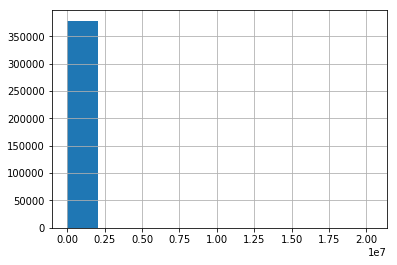

In [164]:
%matplotlib inline
kickstarter_2018.usd_pledged.hist();

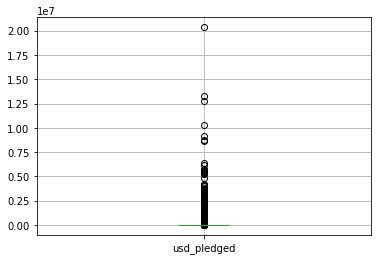

In [81]:
kickstarter_2018.boxplot(column='usd_pledged');

"There are many rules of thumb for how to define an outlier but there is no silver bullet. One rule of thumb is that any data point that is three standard deviations away from the mean of the same data point for all observations."

In [82]:
outliers = kickstarter_2018[kickstarter_2018.usd_pledged > (kickstarter_2018.usd_pledged.mean() + 
                                                            3 * kickstarter_2018.usd_pledged.std())]
outliers

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real,name_weirdness
ID,,,,,,,,,,,,,,,
1000629643,ODIN: Android 'Smart' Projector to Carry in Yo...,Hardware,Technology,USD,2014-07-08,250000.00,2014-05-28 13:54:18,268192.00,successful,561,US,268192.00,268192.00,250000.00,0
1000725978,"Air Bonsai | Create your ""little star""",Product Design,Design,USD,2016-03-01,80000.00,2016-01-21 12:18:00,843743.00,successful,3784,US,843743.00,843743.00,80000.00,0
1001502333,Pimax: The World's First 8K VR Headset,Hardware,Technology,USD,2017-11-03,200000.00,2017-09-19 19:02:23,4236618.49,successful,5946,US,608194.00,4236618.49,200000.00,0
1003182869,RinseKit: The Revolutionary Portable Shower,Gadgets,Technology,USD,2016-06-03,30000.00,2016-05-04 19:27:57,396299.00,successful,2412,US,396299.00,396299.00,30000.00,0
1006008989,War for the Overworld,Video Games,Games,GBP,2013-01-03,150000.00,2012-11-29 19:11:23,211371.50,successful,8351,GB,338527.51,338589.87,240280.65,0
1008109037,The Electron: Cellular dev kit with a global d...,DIY Electronics,Technology,USD,2015-04-02,30000.00,2015-02-25 20:15:17,578478.33,successful,5564,US,578478.33,578478.33,30000.00,0
1008826259,"NORTH DRINKWARE : Mt. Hood, The Oregon Pint Glass",Product Design,Design,USD,2015-03-05,15000.00,2015-02-01 14:38:37,531581.00,successful,5620,US,531581.00,531581.00,15000.00,0
101767263,3Doodler: The World's First 3D Printing Pen,Hardware,Technology,USD,2013-03-25,30000.00,2013-02-19 06:08:59,2344134.67,successful,26457,US,2344134.67,2344134.67,30000.00,0
1019039281,The Apocrypha Adventure Card Game,Tabletop Games,Games,USD,2015-05-14,66666.00,2015-04-14 17:00:06,333661.99,successful,2477,US,333661.99,333661.99,66666.00,0


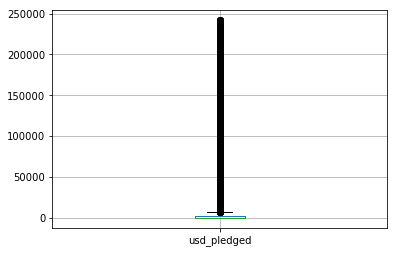

In [83]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged');

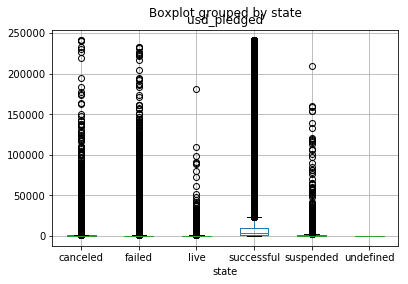

In [84]:
kickstarter_2018.drop(outliers.index).boxplot(column='usd_pledged',by='state');

Analizar outliers por categorías

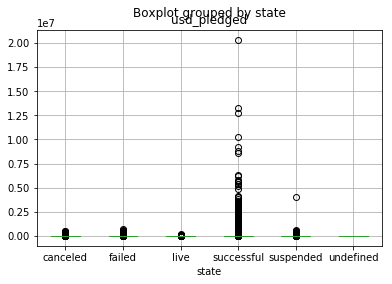

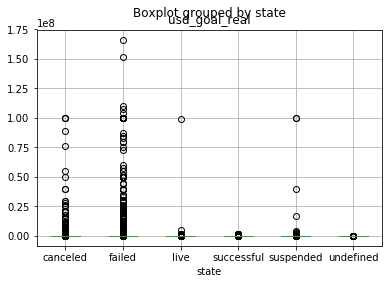

In [85]:
kickstarter_2018.boxplot(column='usd_pledged',by='state');
kickstarter_2018.boxplot(column='usd_goal_real',by='state');

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [167]:
outliers2 = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]


**Boxplot de 'usd_goal_real' por categoría principal, sin valores atípicos.**

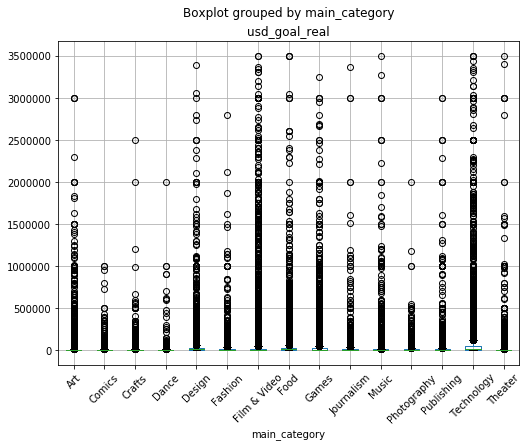

In [173]:
kickstarter_2018.drop(outliers2.index).boxplot(column='usd_goal_real',by='main_category', rot=45, figsize=(8,6));

**Boxplot de 'usd_goal_real' por categoría principal, incluyendo los valores atípicos.**

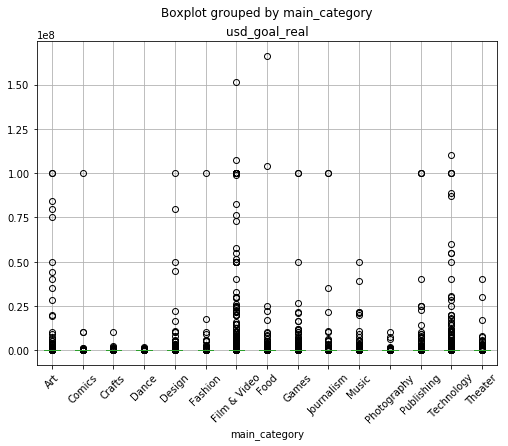

In [174]:
kickstarter_2018.boxplot(column='usd_goal_real',by='main_category',rot=45, figsize=(8,6));

## 2.7. Evaluar cómo comprimir los datos 
para su almacenamiento más eficiente.

En la actualidad, en las nubes el almacenamiento no suele ser problema sino la velocidad para leerlo que suele ser determinante a la hora de determinar el formato de almacenamiento.


## 2.8. Guardar el set de datos con un nombre informativo.


EL problema de la ingeniería de software